In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [80]:
#url = "http://h1bdata.info/index.php?em={}".format('Toyota')
#url

In [81]:
#url
#type(url)
#content = requests.get(url).text
#type(content)
#content

In [82]:
#soup = BeautifulSoup(content, "html.parser")
#type(soup)
#table = soup.find("tbody")
#print(table)

http://h1bdata.info/index.php?em=&job=&city=JERSEY+CITY&year=All+Years

In [83]:
def collect_tables(target):
    # access website, populate form, get results as html
    url = "http://h1bdata.info/index.php?em={}".format(target)
    content = requests.get(url).text
    
    #process the html code
    soup = BeautifulSoup(content)
    table = soup.find("tbody")  #go to table body
    colnames = [tag.text for tag in soup.find("thead").find_all("th")]  #fetch Column headers

    #cycle through tags and populate df with contents
    df = pd.DataFrame(
        ((tag.text for tag in lst.find_all("td")) for lst in table.find_all("tr")),
        columns = colnames
    )
    return df

In [84]:
targets = ["Bloomberg", "Factset"]
collection = [collect_tables(target) for target in targets]

C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\traveler\Anaconda3\envs\py35\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [85]:
#print(collection[0].shape)
#type(collection[0].head())
collection[0].head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,BLOOMBERG LP,ABAP DEVELOPER,"135,000","NEW YORK, NY",02/18/2014,03/03/2014,CERTIFIED
1,BLOOMBERG LP,ABAP DEVELOPER,"145,000","NEW YORK, NY",02/18/2014,08/01/2014,CERTIFIED
2,BLOOMBERG LP,ACCOUNT MANAGER,"87,500","NEW YORK, NY",03/15/2016,09/01/2016,CERTIFIED
3,BLOOMBERG LP,ACCOUNT MANAGER,"89,500","NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED
4,BLOOMBERG LP,ACCOUNT MANAGER,"100,000","NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED


In [86]:
print(collection[1].shape)
collection[1].head()

(653, 7)


,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,FACTSET RESEARCH SYSTEMS INC,AMERICAS GLOBAL BANKS GBB STRATEGIC CONSULTANT,"63,086","NEW YORK, NY",03/10/2015,09/05/2015,CERTIFIED
1,FACTSET RESEARCH SYSTEMS INC,ANALYTICS RESEARCH ASSISTANT,"96,000","NEW YORK, NY",03/03/2017,08/30/2017,CERTIFIED
2,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"37,100","YOUNGSTOWN, OH",03/09/2017,08/24/2017,CERTIFIED
3,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"60,000","NORWALK, CT",04/09/2015,04/20/2015,CERTIFIED
4,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"60,000","NORWALK, CT",04/07/2014,10/02/2014,CERTIFIED


In [87]:
df = pd.concat(collection).reset_index(drop=True)
df.tail()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
2797,FACTSET RESEARCH SYSTEMS INC,TECHNICAL CONSULTANT,"100,000","LOS ANGELES, CA",03/21/2018,06/04/2018,CERTIFIED
2798,FACTSET RESEARCH SYSTEMS INC,UNIVERSAL SCREENING APPLICATION MANAGER,"117,000","NORWALK, CT",03/06/2015,09/02/2015,CERTIFIED
2799,FACTSET RESEARCH SYSTEMS INC,"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND ...","140,000","NORWALK, CT",08/31/2017,02/20/2018,CERTIFIED
2800,FACTSET RESEARCH SYSTEMS INC,"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND ...","140,000","NORWALK, CT",09/06/2017,02/20/2018,CERTIFIED
2801,FACTSET RESEARCH SYSTEMS INC,"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND ...","161,512","NORWALK, CT",01/16/2018,02/20/2018,CERTIFIED


In [88]:
df.columns

Index(['EMPLOYER', 'JOB TITLE', 'BASE SALARY', 'LOCATION', 'SUBMIT DATE',
       'START DATE', 'CASE STATUS'],
      dtype='object')

In [89]:
len(df)

2802

### #The long (and understandable) way...elementwise
print(df['BASE SALARY'].head())

#### #strip out commas from each cell in this column
temp1 = df['BASE SALARY'].apply(lambda x: str(x).replace(',',''))

print(temp1.head())

#### #convert column from str to a number
temp2 = pd.to_numeric(temp1)

temp2.head()

#### #copy back resultant Column (series type) over original Column
df['BASE SALARY'] = temp2


df['BASE SALARY'].head()

In [90]:
# The long (and understandable way)  operating on a Series
print(df['BASE SALARY'].head())

#strip out commas from each cell in this column
df['BASE SALARY'] = pd.to_numeric(df['BASE SALARY'].apply(lambda x: str(x).replace(',','')))

#this won't work because to_numberic is only on pd level 
#df['BASE SALARY'].apply(lambda x: str(x).replace(',','')).to_numeric()
#dir(df['BASE SALARY'])

print(df['BASE SALARY'].head())
#print(temp5.head())

#df.head()

0    135,000
1    145,000
2     87,500
3     89,500
4    100,000
Name: BASE SALARY, dtype: object
0    135000
1    145000
2     87500
3     89500
4    100000
Name: BASE SALARY, dtype: int64


### Alternate method (broadcast at DataFrame level)

In [91]:
#get a fresh DF
df_ = pd.concat(collection).reset_index(drop=True)

df_['BASE SALARY'] = df_['BASE SALARY'].str.replace(',','')
df_.tail()  #Luke Lin? why doesn't this command successfullly stripp our the commas?

df_['BASE SALARY'] = df_['BASE SALARY'].str.replace(',','').astype(int)
type(df_['BASE SALARY'][0])

numpy.int32

In [92]:
#add a column call state
newcol = df_['LOCATION'].apply(lambda x: x.split(', ') [-1])
df_['STATE'] = newcol
df_.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
0,BLOOMBERG LP,ABAP DEVELOPER,135000,"NEW YORK, NY",02/18/2014,03/03/2014,CERTIFIED,NY
1,BLOOMBERG LP,ABAP DEVELOPER,145000,"NEW YORK, NY",02/18/2014,08/01/2014,CERTIFIED,NY
2,BLOOMBERG LP,ACCOUNT MANAGER,87500,"NEW YORK, NY",03/15/2016,09/01/2016,CERTIFIED,NY
3,BLOOMBERG LP,ACCOUNT MANAGER,89500,"NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED,NY
4,BLOOMBERG LP,ACCOUNT MANAGER,100000,"NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED,NY


In [93]:
#titanic.pivot_table('survived', index='sex', columns='pclass', aggfunc= 'max')
agglist = ('count','mean', 'min', 'max')

pd.set_option('precision',5)

#temp3 = df_.pivot_table('BASE SALARY', index = ["STATE", "EMPLOYER"], aggfunc = agglist)
temp3 = df_.pivot_table('BASE SALARY', index = ["EMPLOYER"], aggfunc = agglist)

temp3.sort_values('count', ascending=False)
#print(temp3)

,count,mean,min,max
EMPLOYER,,,,
BLOOMBERG LP,2130,142303.22676,45000,585000
FACTSET RESEARCH SYSTEMS INC,653,92029.93568,30035,210000
BLOOMBERG TRADEBOOK LLC,9,180944.44444,50000,315000
BLOOMBERG POLARLAKE USA LLC,4,118500.00000,118000,120000
BLOOMBERG INDEX SERVICES LIMITED,3,103333.33333,70000,135000
BLOOMBERG ASSOCIATES LLC,2,70000.00000,65000,75000
BLOOMBERG STP LLC,1,145500.00000,145500,145500


#short way to filter on NJ
print(temp3.xs('NY'))

#long way to do it
temp4 = temp3.loc['NY']
temp4

In [94]:
df_.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
0,BLOOMBERG LP,ABAP DEVELOPER,135000,"NEW YORK, NY",02/18/2014,03/03/2014,CERTIFIED,NY
1,BLOOMBERG LP,ABAP DEVELOPER,145000,"NEW YORK, NY",02/18/2014,08/01/2014,CERTIFIED,NY
2,BLOOMBERG LP,ACCOUNT MANAGER,87500,"NEW YORK, NY",03/15/2016,09/01/2016,CERTIFIED,NY
3,BLOOMBERG LP,ACCOUNT MANAGER,89500,"NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED,NY
4,BLOOMBERG LP,ACCOUNT MANAGER,100000,"NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED,NY


In [95]:
#show types of jobs
df_['JOB TITLE'].value_counts()

SENIOR SOFTWARE DEVELOPER                                   754
SOFTWARE ENGINEER                                           484
SOFTWARE DEVELOPER                                          335
TEAM LEADER                                                 171
SENIOR SOFTWARE ENGINEER                                     63
FINANCIAL ENGINEER                                           44
REPORTER                                                     34
FIS REPRESENTATIVE                                           24
PRODUCT MANAGER                                              21
EDITOR                                                       20
SYSTEMS ENGINEER                                             17
QUANTITATIVE ANALYST                                         16
DATA ANALYST                                                 15
LEAD SOFTWARE ENGINEER                                       13
SAP ABAP DEVELOPER                                           13
MACHINE LEARNING ENGINEER               

In [96]:
#Factset Only
#show types of jobs
df_2 = collection[1]
df_2['BASE SALARY']= df_2['BASE SALARY'].str.replace(',','').astype(int)
#df_2['JOB TITLE'].value_counts()
df_2['JOB TITLE'].value_counts()

SOFTWARE ENGINEER                                               434
FINANCIAL ENGINEER                                               36
SENIOR SOFTWARE ENGINEER                                         24
SYSTEMS ENGINEER                                                 16
LEAD SOFTWARE ENGINEER                                           13
MACHINE LEARNING ENGINEER                                        12
SOFTWARE DEVELOPER                                                9
PRODUCT MANAGER                                                   8
PRODUCT DEVELOPER                                                 8
ASSOCIATE CONTENT MANAGER                                         8
BUSINESS ANALYST                                                  5
SENIOR SOFTWARE DEVELOPER                                         5
NLP/ML TECHNICAL LEAD                                             3
CONTENT SPECIALIST                                                3
QUALITY ASSURANCE ENGINEER                      

In [97]:
%matplotlib inline
#import seaborn as sns
#sns.set()

agglist = ('count', 'mean', 'max')
new = df_2.pivot_table('BASE SALARY', index='JOB TITLE', aggfunc=agglist)
new.sort_values('mean', ascending = False)


#df_2.groupby(['EMPLOYER'])['BASE SALARY'].plot(kind='box', legend = True, meanline = True, showmeans=True)
#df_2.dtypes

,count,mean,max
JOB TITLE,,,
GLOBAL HEAD OF DEVELOPMENT & PROFESSIONAL SERVICES- PORTWARE,1,210000.00000,210000
"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND CONSUTING TECH",2,150756.00000,161512
FIXED INCOME PRODUCT DEVELOPER,1,150000.00000,150000
"MANAGER, RISK ANALYTICS ENGINEERING",1,150000.00000,150000
MANAGER OF RISK ANALYTICS ENGINEERING GROUP,1,150000.00000,150000
PRODUCT MANAGER - FIXED INCOME RESEARCH,1,150000.00000,150000
"ASSOCIATE DIRECTOR, APPLICATION DEVELOPMENT",1,150000.00000,150000
"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND CONSULTING",1,140000.00000,140000
PROGRAMMER / ANALYST,2,136229.00000,137458


EMPLOYER
FACTSET RESEARCH SYSTEMS INC    Axes(0.125,0.125;0.775x0.755)
Name: BASE SALARY, dtype: object

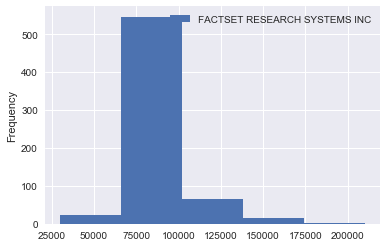

In [98]:

df_2.groupby(['EMPLOYER'])['BASE SALARY'].plot(kind='hist', legend = True, bins=5)


In [99]:
import numpy as np
#filter/sub-set just on a single job description
position1 = df_[df_['JOB TITLE'] == 'DATA SCIENTIST']

#two ways to merge similar titles 
#method1
#df_['JOB TITLE'][df_['JOB TITLE'].str.contains('MACHINE LEARNING')] ="MACHINE_LEARNING"
df_['JOB TITLE'][df_['JOB TITLE'].str.contains('SOFTWARE ENGINEER')] ="SOFTWARE_ENGINEER"

#method2
df_['JOB TITLE']= df_['JOB TITLE'].apply(lambda x: "MACHINE_LEARNING" if "MACHINE LEARNING" in x else x)

##bonus groupings
df_['JOB TITLE'][df_['JOB TITLE'].str.contains('DEVELOPER')] ="DEVELOPER_"


df_['JOB TITLE'].value_counts()



C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


DEVELOPER_                                                  1170
SOFTWARE_ENGINEER                                            572
TEAM LEADER                                                  171
FINANCIAL ENGINEER                                            44
REPORTER                                                      34
FIS REPRESENTATIVE                                            24
PRODUCT MANAGER                                               21
EDITOR                                                        20
SYSTEMS ENGINEER                                              17
QUANTITATIVE ANALYST                                          16
DATA ANALYST                                                  15
MACHINE_LEARNING                                              14
UX DESIGNER                                                   11
FINANCIAL INFORMATION SERVICES REPRESENTATIVE                 10
IMPLEMENTATION SPECIALIST                                     10
RESEARCH ASSOCIATE       

In [100]:

#["MACHINE_LEARNING" for x in df_['JOB TITLE'].index if df_['JOB TITLE'].str.contains('MACHINE LEARNING') == True]

#mljobs = df_['JOB TITLE'].replace(df_['JOB TITLE'].str.contains('MACHINE LEARNING')==True, 'MACHINE_LEARNING')
#mljobs.value_counts()

#type(mljobs[0])
#print(mljobs.value_counts())

#df_['JOB TITLE'] = np.where(mljobs, 'MACHINE_LEARNING')
#df_[df_['JOB TITLE'] = np.where(mljobs, 'MACHINE_LEARNING')
#df_['JOB TITLE'].value_counts()

#temp = df_['JOB TITLE'].str.contains('MACHINE LEARNING').
#temp.count(df_['JOB TITLE']==True)
#position1.head(n=10)

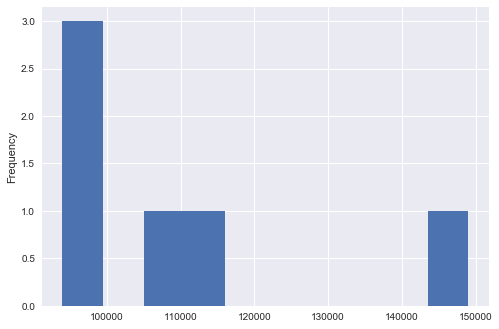

In [101]:
%matplotlib inline
import seaborn as sns
sns.set()

position1['BASE SALARY'].plot(kind='hist', bins=10)

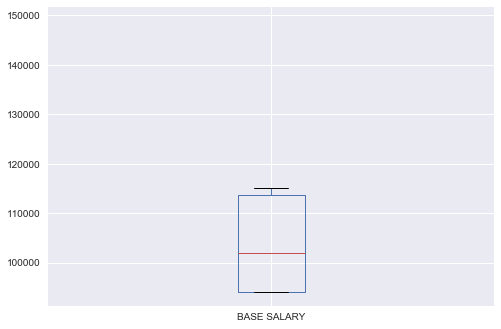

In [102]:
position1['BASE SALARY'].plot(kind='box', legend=True)

In [103]:
position1.info

<bound method DataFrame.info of                           EMPLOYER       JOB TITLE  BASE SALARY  \
141                   BLOOMBERG LP  DATA SCIENTIST        94000   
142                   BLOOMBERG LP  DATA SCIENTIST        94000   
143                   BLOOMBERG LP  DATA SCIENTIST        94000   
144                   BLOOMBERG LP  DATA SCIENTIST       110000   
145                   BLOOMBERG LP  DATA SCIENTIST       149000   
2173  FACTSET RESEARCH SYSTEMS INC  DATA SCIENTIST       115000   

           LOCATION SUBMIT DATE  START DATE CASE STATUS STATE  
141    SKILLMAN, NJ  02/02/2018  07/23/2018   CERTIFIED    NJ  
142   PRINCETON, NJ  02/06/2017  06/27/2017   CERTIFIED    NJ  
143    SKILLMAN, NJ  03/04/2017  06/27/2017   CERTIFIED    NJ  
144   PRINCETON, NJ  03/17/2015  04/06/2015   CERTIFIED    NJ  
145    NEW YORK, NY  03/02/2016  09/01/2016   CERTIFIED    NY  
2173   NEW YORK, NY  03/03/2017  08/30/2017   CERTIFIED    NY  >

In [104]:
agglist = ('count','mean', 'min', 'max')

pd.set_option('precision',5)

#temp3 = df_.pivot_table('BASE SALARY', index = ["STATE", "EMPLOYER"], aggfunc = agglist)
result1 = position1.pivot_table('BASE SALARY', index = ["EMPLOYER"], aggfunc = agglist)

result1.sort_values('count', ascending=False)
result1

,count,mean,min,max
EMPLOYER,,,,
BLOOMBERG LP,5,108200,94000,149000
FACTSET RESEARCH SYSTEMS INC,1,115000,115000,115000


In [109]:
#table2.sort_values('count', ascending=False)

#table2 = df_.pivot_table('BASE SALARY', index = ['EMPLOYER','JOB TITLE'], aggfunc = agglist)

#table2.sort_values('mean', ascending=False)
#table2